# Práctica: análisis y exploración de datos
Clase 21 del Curso de Principios de Visualización de Datos para Business Intelligence

In [3]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#import geopandas as gpd

In [4]:
df = pd.read_csv('superstore.csv')

### Pregunta 1
¿Cuál es la categoría de productos más vendida?

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,,
Furniture,10693326,118196026,741999.7953,8028,368.89,18451.2728
Office Supplies,30010535,330772872,719047.0320,22906,947.80,122490.8008
Technology,9241154,102603754,836154.0330,6939,244.40,145454.9481


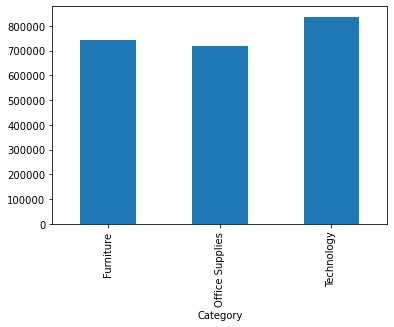

In [9]:
Q1 = df.groupby(['Category']).sum('Sales')
Q1['Sales'].plot(kind='bar')
Q1

### Pregunta 2
¿Quién es el cliente que compra más?

In [10]:

Q2 = df.groupby(['Customer Name']).sum('Sales')
Q2 = Q2.sort_values(by=['Sales'], ascending=False)
Q2.head()
#Q1['Sales'].plot(kind='bar')

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Customer Name,,,,,,
Sean Miller,77545,482091,25043.050,50,3.7,-1980.7393
Tamara Chand,75386,586036,19052.218,42,1.4,8981.3239
Raymond Buch,69857,914035,15117.339,71,1.7,6976.0959
Tom Ashbrook,48932,375032,14595.620,36,0.8,4703.7883
Adrian Barton,130088,1359311,14473.571,73,4.8,5444.8055


### Pregunta 3
¿En qué Trimestre (Q) se realizan más ventas?

In [11]:
Q3 = df.loc[:,['Order Date','Sales']]
Q3['Date'] = pd.to_datetime(Q3['Order Date'], dayfirst=True)
Q3['Year'] = Q3['Date'].dt.year
Q3['Quarter'] = Q3['Date'].dt.quarter
#Q3.to_csv('example.csv', index=False)
years = list(set(Q3['Year']))
years.sort()
quarter = list(set(Q3['Quarter']))
lista = [[],[],[],[]]
for y in years:
    a=0
    for i in quarter:
        b = Q3[(Q3['Year'] == y) & (Q3['Quarter'] == i)].count()['Sales']
        lista[a].append(b)
        a=a+1

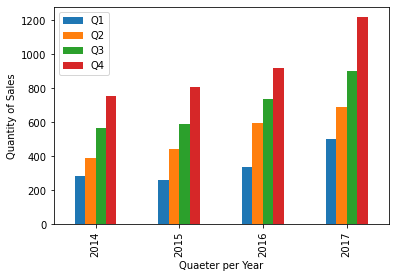

In [12]:
df = pd.DataFrame({'Q1': lista[0],
                   'Q2': lista[1],
                   'Q3': lista[2],
                   'Q4': lista[3],}, index=years)
ax = df.plot.bar(xlabel = 'Quaeter per Year', ylabel='Quantity of Sales')